# **AE2: The Color Language Game**

## **Summary**

Imagine that you are employed by an education technology company developing an
online game to help foreign language speakers learn colour names and their
synonyms in English. During the game, a fictional teacher, named Alice, will
randomly select N=10 number of colours specified in RGB format (e.g., R=20, G=85,
B=128...). Alice will then ask each player, known as Bob, to assign the most
appropriate colour name to each test colour based on a given dataset. Alice will
assess the player’s understanding of colour naming by measuring the distance
between her chosen test colours and the centre of mass (known as centroid) of each
colour name in RGB. Upon completion of the game, Alice shows to players a
weighted graph of the English colour language that allows players to explore the relationship between different colour synonyms in the given dataset, such as which
colour names are often confused with each other.

## **Task 1: Guessing the name of a colour by Bob**

**Load and Clean the Data**




In [1]:
# imports 
import pandas as pd
import string
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import networkx as nx


2. Loads a given dataset from an online experiment (from colournaming.org and
accessible on Canvas) that consists of thousands of colour naming responses
mapped to RGB triplets by thousands of participants. Note that each colour
name is a category assigned to multiple RGB colour values in this dataset.

3. Prepares the raw data for analysis by making consistent the case of all letters
and removing punctuation marks and unnecessary white space

In [2]:
# reads the data using pandas and loads into a dataframe 

color_df = pd.read_csv("colour_naming_data-1.csv", header = None)

# drops the first 4 rows which was the header as rows 
color_df = color_df.drop([0,1,2,3])

# turns the current first line into a list to be used as the header and sets it
color_header = color_df.iloc[0].tolist()
color_df.columns = color_header

# drops the header from the lines of the dataframe 
color_df = color_df.drop([4])
    

def clean_text(text):
    """
    Parameters
    ----------
    text : string
        This is the color name that is passed from the dataframe one row at a time

    Returns
    -------
    cleaned_text : string
        This is the cleaned color name that has removed punctuation, lowercase, and no digits if any
        
    """
    # Remove punctuation, digits and lowered
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation)).translate(str.maketrans('', '', string.digits)).lower()
    
    return cleaned_text
    

# applies function to each row of the dataframe in the cleaned colors column, and adds a new column with color names 
color_df["cleaned_colors"] = color_df["colour_name"].apply(clean_text)
# drops the old color name column
color_df = color_df.drop(["colour_name"], axis = 1)
color_df

,sample_id,R,G,B,cleaned_colors
5,24,77,72,52,dark khaki
6,64,77,38,28,dark brown
7,202,111,120,164,pale greyish blue
8,236,212,160,187,pale pink
9,308,112,163,70,light green
...,...,...,...,...,...
5000,329,189,130,175,pink
5001,379,125,33,99,red violet
5002,507,133,0,124,red blue
5003,551,178,120,244,red violet


**1. Alice provides a set of N = 10 colours in RGB format.**

In [3]:
def pick_colors(color_df):
    """
    Parameters
    ----------
    color_df : dataframe
        This is a dataframe that contains the cleaned_colors and their RGB values

    Returns
    -------
    rgb_values : nested list
        This is a nested list of 10 randomly generated RGB values by Alice 
        
    """
    # initializes empty list
    rgb_values = []

    # for loop to generate 10 values 
    for i in range(10):
        # uses random.choice to pick random values from the R,G, and B columns of the dataframe
        r_value = int(random.choice(color_df["R"]))
        g_value = int(random.choice(color_df["G"]))
        b_value = int(random.choice(color_df["B"]))

        # appends the a list of the three values to a list
        rgb_values.append([r_value,g_value,b_value])
        
    return rgb_values
    
# calls the function and prints RGB values     
rgb_values = pick_colors(color_df)
print(rgb_values)
    

[[31, 180, 106], [197, 37, 202], [41, 72, 228], [235, 194, 101], [151, 147, 117], [48, 107, 209], [212, 110, 116], [149, 139, 30], [212, 3, 231], [97, 168, 8]]


**kNN Model**

1. Trains a k-nearest neighbor (kNN) model with the clean data to classify each
test colour to a colour name. Bob evaluates the performance of kNN with an
n-fold cross validation. Instead of breaking the data into a test set and a
training set, Bob classifies each example by finding the k nearest neighbours
among all other instances in the dataset.

3. Performs hyper-parameter tuning by testing the classifier's performance for k
= 1, 2, 3, ..., 12.

In [4]:
def train_knn(rgb_values, n_neighbors):
    """
    Parameters
    ----------
    rgb_values : nested list
        This is a nested list of 10 randomly generated RGB values by Alice 
    n_neighbors: int
        This is the k value (1-12) that will be passed in when the function is called 12 times

    Returns
    -------
    predicted_colors :  list
        This  list of the 10 predicted colors from Alices randomly chosen RGB values 
        
    """
    # initalizes an empty list to contain the predicted colors 
    predicted_colors = []
    # sets up KNN classifier with the k value as a parameter
    knn = KNeighborsClassifier(n_neighbors)
    # sets xtrain to the RGB values and y_train as the color names 
    x_train = color_df[["R", "G", "B"]].values
    y_train = color_df["cleaned_colors"].values
    # fits data to knn model 
    knn.fit(X = x_train, y = y_train)

    # iterates through alices RGB values and puts them through the model 
    # appends predicted colors to a list 
    for colors in rgb_values:
        predicted = (knn.predict([colors]))
        for predict in predicted:
            predicted_colors.append(predict) 

    return predicted_colors

# creates color_dict dictionary to convert data into a dataframe
color_dict = {}    
for i in range(1, 13):
        # calls the function 12 times to produce data for k-values 1-12
        predicted_colors = train_knn(rgb_values, i)
        color_dict["k = "+ str(i)] = predicted_colors
# converts dictionary to dataframe         
alice_color_df = pd.DataFrame.from_dict(color_dict)
alice_color_df


,k = 1,k = 2,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8,k = 9,k = 10,k = 11,k = 12
0,green,green,green,green,green,green,green,green,green,green,green,green
1,magenta,magenta,magenta,magenta,fuchsia,fuchsia,fuchsia,fuchsia,fuchsia,fuchsia,pink,pink
2,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue
3,musty yellow,musty yellow,yellow,yellow,yellow,yellow,yellow,yellow,yellow,yellow,yellow,yellow
4,olive,earthy green,earthy green,olive,olive,olive,olive,olive,olive,olive,olive,olive
5,navy blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue,blue
6,medium pink,carnation pink,carnation pink,carnation pink,carnation pink,carnation pink,carnation pink,carnation pink,carnation pink,carnation pink,carnation pink,pink
7,mustard green,greenleaf,greenleaf,greenish yellow,greenish yellow,greenish yellow,chartreuse,chartreuse,chartreuse,chartreuse,chartreuse,chartreuse
8,lilac,lilac,lilac,blue,blue,blue,violet,violet,violet,violet,violet,violet
9,grass green,grass green,grass green,grass green,grass green,bright green,bright green,green,green,green,grass green,green


**Performance Report**

**a) overall accuracy of kNN, as well as the weighted average precision,
recall and f1-score for each k-value. The scikit learn metrics library may
be used to generate a classification report and extract these values**


In [5]:
def performance_report(n_neighbors):
    """
    Parameters
    ----------
    n_neighbors: int
        This is the k value (1-12) that will be passed in when the function is called 12 times

    Returns
    -------
    f1_score: float of f1 scores for each k-value 1-12
    accuracy: float of accuracy scores for each k-value 1-12
    precision: float of precision scores for each k-value 1-12
    recall: float of recall scores for each k-value 1-12
  
    """
    # sets up knn classifer with k-value as a parameter 
    knn = KNeighborsClassifier(n_neighbors)
    # sets x_train to the RGB values and y_train to the color names 
    x_train = color_df[["R", "G", "B"]].values
    y_train = color_df["cleaned_colors"].values
    # fits data to the model 
    knn.fit(X = x_train, y = y_train)

    # passes all the RGB values from the dataframe into knn model 
    predicted = knn.predict(X = x_train)
    # expected values are the actual color names for each RGB values 
    expected = y_train

    # generates a classifcation report using slkearn metrics which contains the overall
    # f1, accuracy, precision and recall scores for each color, as well as the averages of these scores
    # for each k-value 
    report = metrics.classification_report(expected, predicted, digits = 3, zero_division = 0.0)
    print("Classification Report for k=", n_neighbors, ":\n",report)

    # seperately calculates the f1, accuracy, precision and recall scores to be plotted later
    f1_score = metrics.f1_score(expected, predicted, average = "macro")
    accuracy = metrics.accuracy_score(expected, predicted)
    precision = metrics.precision_score(expected, predicted, average = "macro", zero_division = 0.0)
    recall = metrics.recall_score(expected, predicted, average = "macro", zero_division = 0.0)
    
    return f1_score, accuracy, precision, recall

def print_report():
    """
    Parameters
    ----------
    none

    Returns
    -------
    f1_scores: list of f1 scores for k-values 1-12
    accuracys: list of accuracy scores for k-values 1-12
    precisions: list of precision scores for k-values 1-12
    recalls: list of recall scores for k-values 1-12
  
    """
    scores = []
    accuracies = []
    precisions = []
    recalls = []
    # calls function 12 times and appends result to a list to contain
    # scores for each k-value 1-12
    for i in range(1, 13):
        f1_score, accuracy, precision, recall = performance_report(i)
        scores.append(f1_score)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
    return scores, accuracies, precisions, recalls

scores, accuracies, precisions, recalls = print_report()


Classification Report for k= 1 :
                                     precision    recall  f1-score   support

                        acid green      0.000     0.000     0.000         2
                         adobe red      0.000     0.000     0.000         1
                        algaegreen      0.000     0.000     0.000         1
                   almost sky blue      0.000     0.000     0.000         1
                           angelic      0.000     0.000     0.000         1
                            appale      0.100     1.000     0.182         1
                      appale green      0.000     0.000     0.000         4
                      appale white      0.091     1.000     0.167         1
                           apricot      0.000     0.000     0.000         2
                              aqua      0.000     0.000     0.000        13
                         aqua blue      0.125     0.500     0.200         2
                        aqua green      0.500     0.2

**b) One or more visualisations to convey how the performance of the
classifier is impacted by different k in kNN**


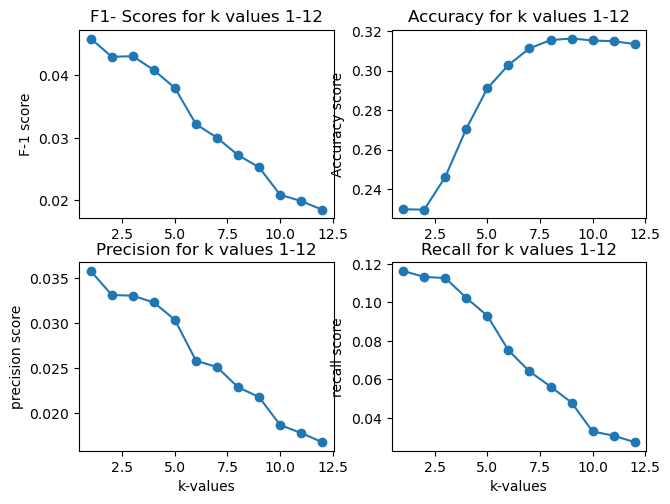

In [6]:
def visualize_performance(scores, accuracies, precisions, recalls):
    """
    Parameters
    ----------
    f1_scores: list of f1 scores for k-values 1-12
    accuracys: list of accuracy scores for k-values 1-12
    precisions: list of precision scores for k-values 1-12
    recalls: list of recall scores for k-values 1-12

    Returns
    -------
    none
  
    """
    fig, ax = plt.subplots(2,2)
    fig.tight_layout()
    
    # plots list of f1 scores on a line graph 
    ax[0,0].plot(range(1,13), scores, marker = "o")
    ax[0,0].set_title("F1- Scores for k values 1-12")
    ax[0,0].set(ylabel = "F-1 score")
    
    
    # plots list of accuracy scores on a line graph 
    ax[0,1].plot(range(1,13), accuracies, marker = "o")
    ax[0,1].set_title("Accuracy for k values 1-12")
    ax[0,1].set(ylabel = "Accuracy score")
    
    # plots list of precision scores on a line graph 
    ax[1,0].plot(range(1,13), precisions, marker = "o")
    ax[1,0].set_title("Precision for k values 1-12")
    ax[1,0].set(xlabel = "k-values", ylabel = "precision score")
    
    # plots list of recall scores on a line graph 
    ax[1,1].plot(range(1,13), recalls, marker = "o")
    plt.title("Recall for k values 1-12")
    ax[1,1].set(xlabel = "k-values", ylabel = "recall score")

    
        
    plt.show()

   
# calls the function
visualize_performance(scores, accuracies, precisions, recalls)

**c) A scatter plot with the test colours represented as points, and each
predicted colour name assigned as a label for each point.**

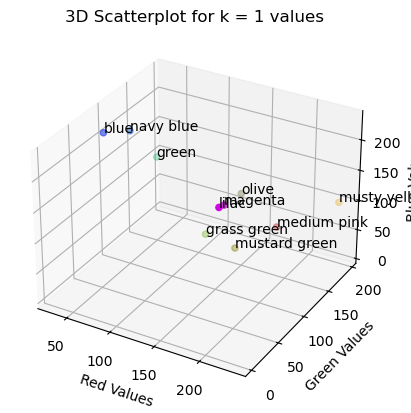

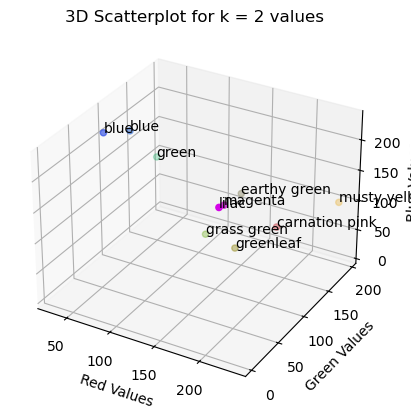

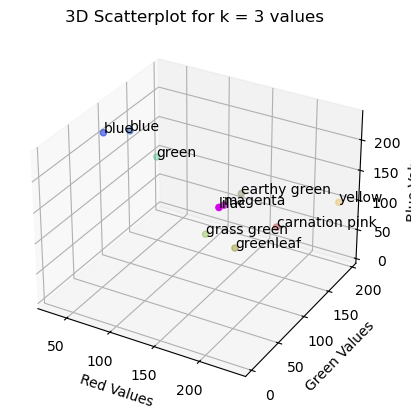

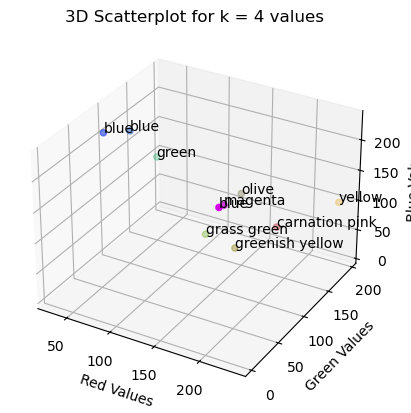

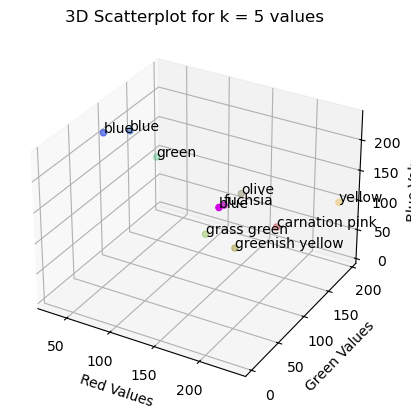

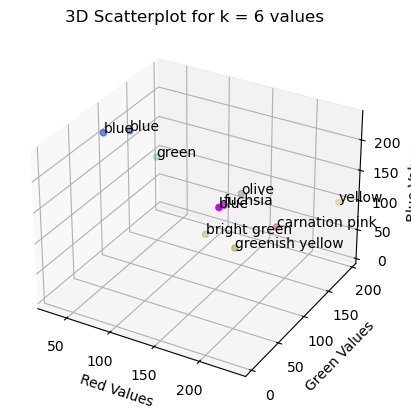

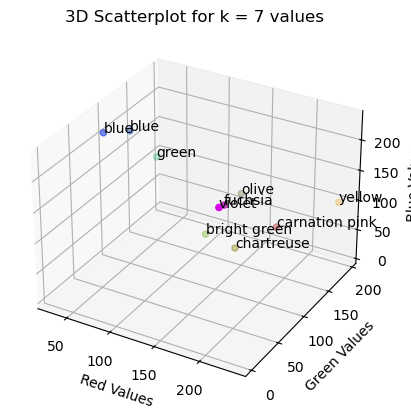

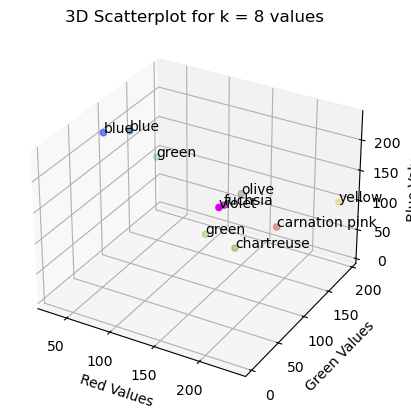

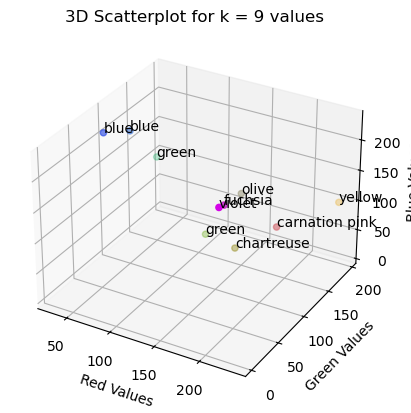

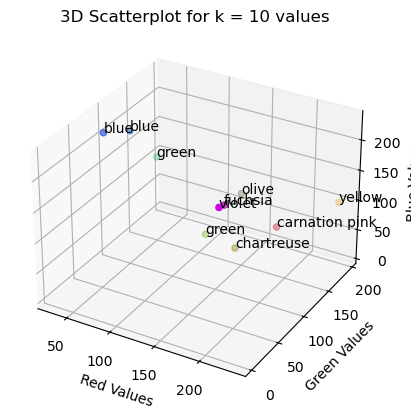

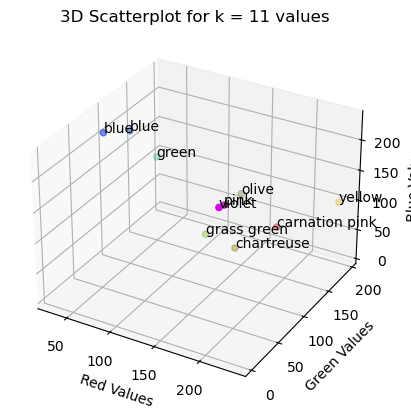

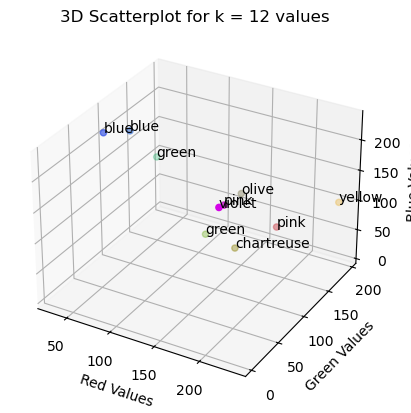

In [7]:
# citation: https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
def plot_scatterplot(rgb_values, alice_color_df):
    """
    Parameters
    ----------
    rgb_values : nested list
        This is a nested list of 10 randomly generated RGB values by Alice 
    alice_color_df: dataframe
        This is a dataframe that contains predicted colornames for k-values 1-12

    Returns
    -------
    none
        
    """
    # iterates through rows and columns of alices df
    for columns, rows in alice_color_df.items():
        # initializes 3 empty lists to contain R,G,B values 
        x_value = []
        y_value = []
        z_value = []
        rgb_list = []
        # creates 3d figure 
        fig = plt.figure()
        ax = fig.add_subplot(projection = "3d")
        
        # iterates through the R,G,B value and color name
        for value, color in zip(rgb_values, rows.values):
            x_value.append(value[0])
            y_value.append(value[1])
            z_value.append(value[2])
            rgb_list.append([value[0]/255, value[1]/255, value[2]/255])
        
            # labels each point with the predicted color 
            ax.text(value[0], value[1], value[2], color)      
        # sets the x,y and z value as the R,G,B values predicted by alice, and labels it the predicted color name by Bob
        ax.scatter(x_value, y_value, z_value, c = rgb_list)
        # sets labels and title 
        ax.set_xlabel("Red Values")
        ax.set_ylabel("Green Values")
        ax.set_zlabel("Blue Values")
        # 12 scatterplots for k-values 1-12 to visualize different color names 
        plt.title("3D Scatterplot for " + columns + " values")
        
# calls function       
plot_scatterplot(rgb_values, alice_color_df)

## **Task 2: Assessing colour names and plotting weighted graphs by Alice**

* Number 1 is in task 1 

**2. Alice measures the Euclidean distance between the test colours and the
centroids of the predicted names of Bob and visualises these distances in a
bar plot.**



green
magenta
blue
musty yellow
olive
navy blue
medium pink
mustard green
lilac
grass green


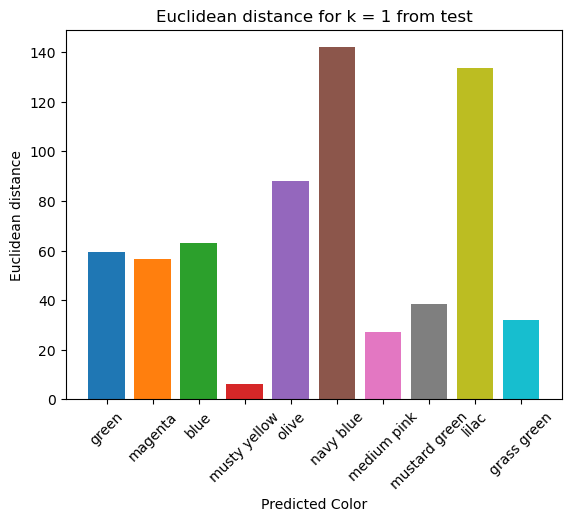

green
magenta
blue
musty yellow
earthy green
blue
carnation pink
greenleaf
lilac
grass green


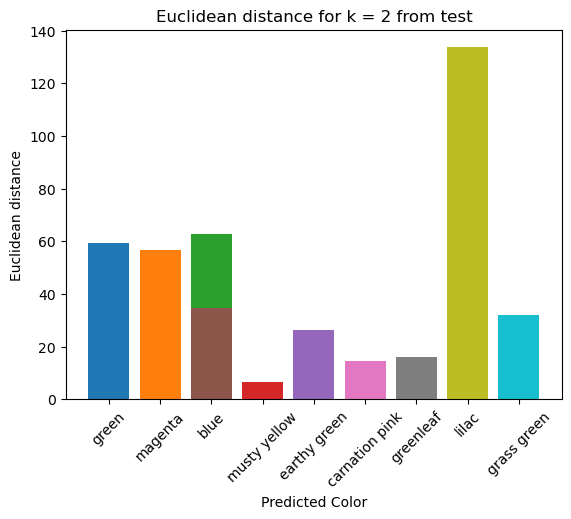

green
magenta
blue
yellow
earthy green
blue
carnation pink
greenleaf
lilac
grass green


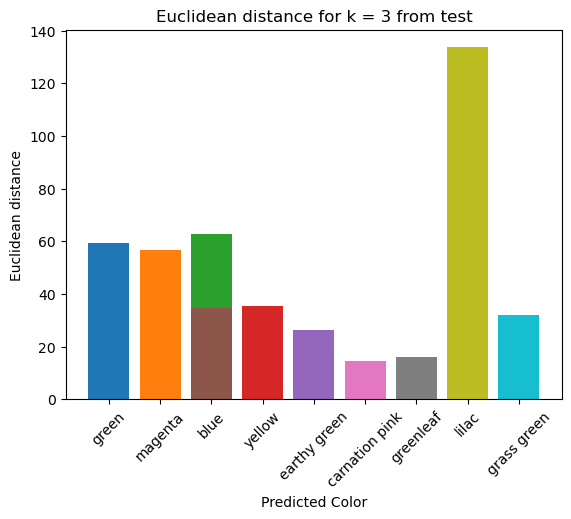

green
magenta
blue
yellow
olive
blue
carnation pink
greenish yellow
blue
grass green


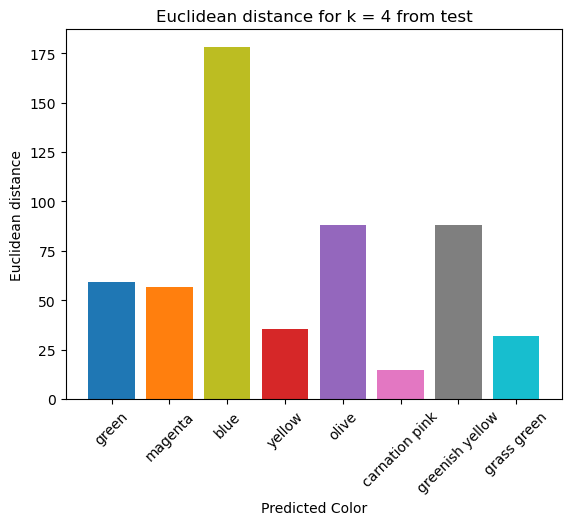

green
fuchsia
blue
yellow
olive
blue
carnation pink
greenish yellow
blue
grass green


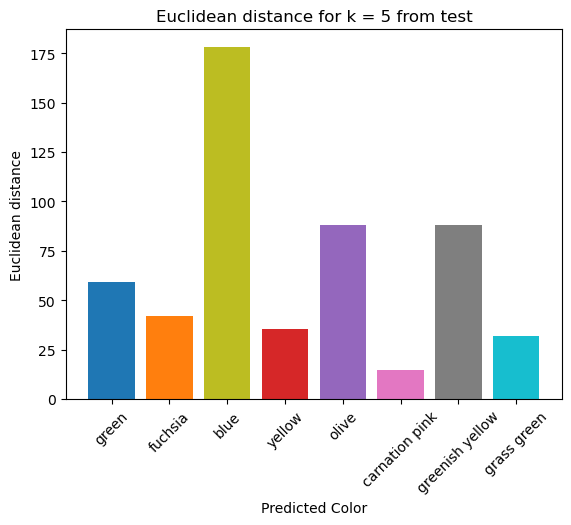

green
fuchsia
blue
yellow
olive
blue
carnation pink
greenish yellow
blue
bright green


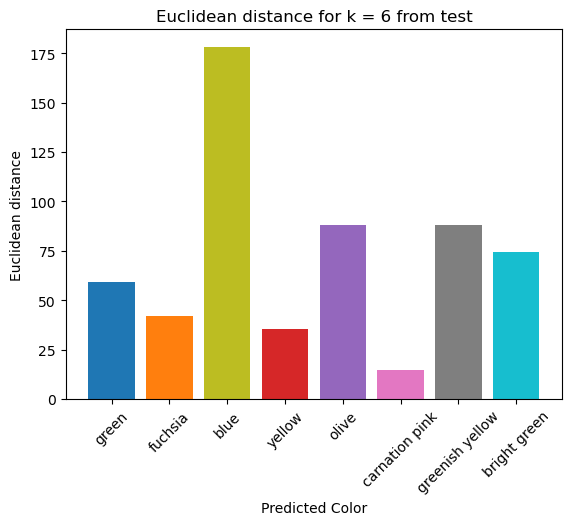

green
fuchsia
blue
yellow
olive
blue
carnation pink
chartreuse
violet
bright green


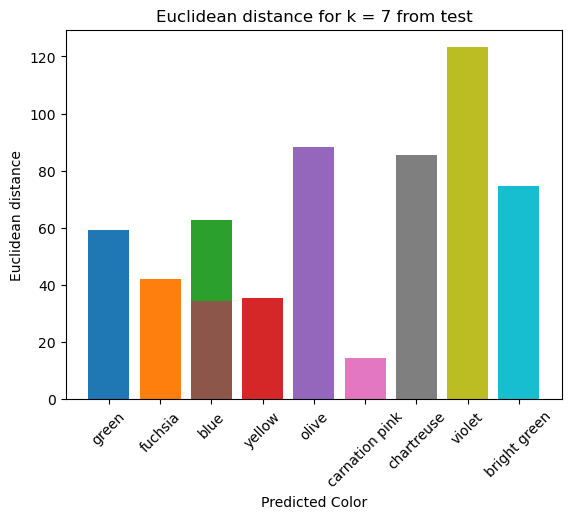

green
fuchsia
blue
yellow
olive
blue
carnation pink
chartreuse
violet
green


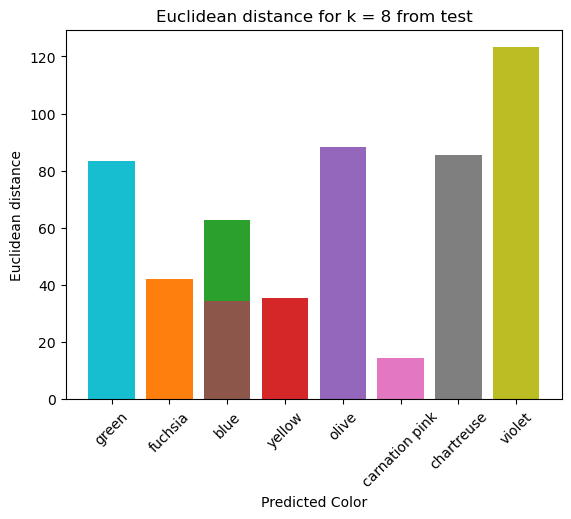

green
fuchsia
blue
yellow
olive
blue
carnation pink
chartreuse
violet
green


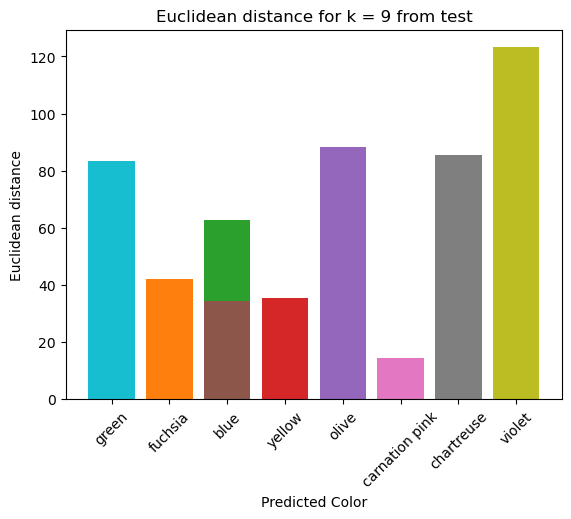

green
fuchsia
blue
yellow
olive
blue
carnation pink
chartreuse
violet
green


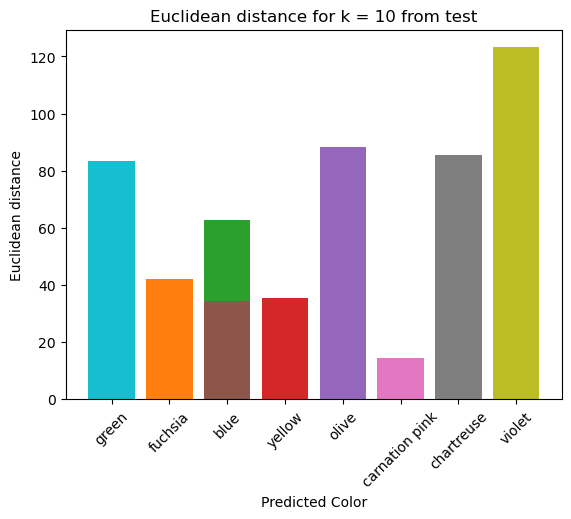

green
pink
blue
yellow
olive
blue
carnation pink
chartreuse
violet
grass green


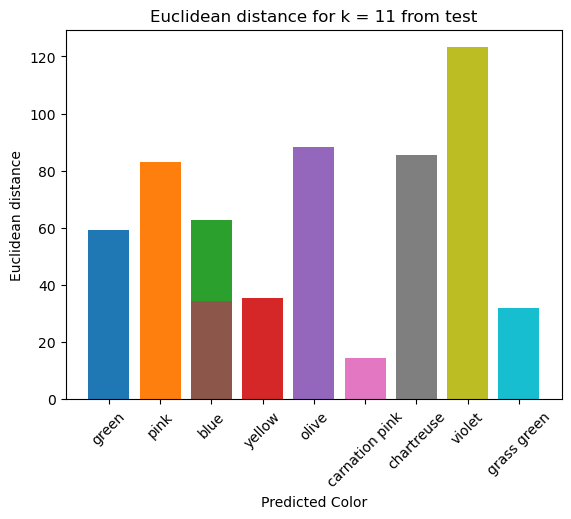

green
pink
blue
yellow
olive
blue
pink
chartreuse
violet
green


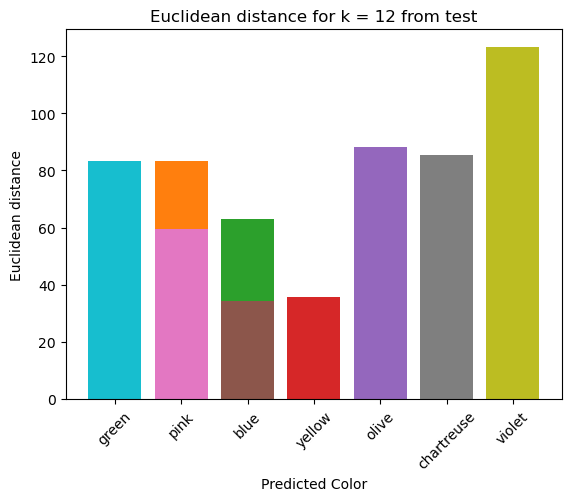

In [8]:

# finding the actual RGB values of the colors predicted by Bob then using the test values RGB values and finding the 
# euclidean distances between them then plotting them in a bar plot 

def euclidean_distance(color_df, alice_color_df, rgb_values):
    """
    Parameters
    ----------
    color_df : dataframe
        This is a dataframe with the cleaned_color names and RGB values for each color 
    alice_color_df: dataframe
        This is a dataframe that contains predicted colornames for k-values 1-12
    rgb_values: nested list
        This is a nested list of the 10 randomly chosen RGB values by Alice 

    Returns
    -------
    none
        
    """

    # converts the R,G and B columns to integers
    # citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
    color_df["R"] = color_df["R"].astype(int)
    color_df["G"] = color_df["G"].astype(int)
    color_df["B"] = color_df["B"].astype(int)
    
    # initializes counter and sets it to 1 
    counter = 1
    # iterates through rows and columns of alice df
    for columns, rows in alice_color_df.items():
        
        for value, color in zip(rgb_values, rows.values):
            # since there are multiple RGB values for each color
            # creates individual dataframes for each color 
            individual_dfs = color_df[color_df["cleaned_colors"] ==  color]
            # finds averages of each column for indivdual dataframe 
            avg_r = individual_dfs["R"].values.mean()
            avg_g = individual_dfs["G"].values.mean()
            avg_b = individual_dfs["B"].values.mean()
            # saves the average RGB values into a list
            avg_rgbval = [avg_r, avg_g, avg_b]

            # uses math.dist to calcuate the euclidean distance between the average RBG values 
            # of the predicted colors, and the given RGB value by Alice 
            euclidean = math.dist(value, avg_rgbval)
            # prints the colors to ensure 10 colors are printed with each graph since
            # some get combined into the columns if there are more than 2 occurances 
            print(color)
            # plots a bar graph with the color name and euclidean distance 
            plt.bar(color, euclidean)
            # 12 graphs for each k-value 
            plt.title("Euclidean distance for " + columns + " from test")
            plt.xlabel("Predicted Color")
            plt.ylabel("Euclidean distance")
            plt.xticks(rotation = 45)

            # since distances were no longer seperated properly by k-value, 
            # uses a counter to plot 10 colors each time to ensure they are the 
            # correct colors for each k-value 
            if counter % 10 == 0:
                plt.show()
               
            counter+=1

# calls function         
euclidean_distance(color_df, alice_color_df, rgb_values)




**3. Alice uses object-oriented methods to create and visualise a weighted
graph of colour synonyms where each node is the centroid of each
unique colour name in the dataset connected to all other nodes by edges
weighted by their distance**

In [9]:
# creates a dataframe with the top 10 colors in the dataset that appear most frequently
# I chose 10 colors because it allows for the best readability of the graph later on
# this can be easily changed to adjust for how many nodes you want to see by changing the .head() line 

def top_10_df(color_df): 
    """
    Parameters
    ----------
    color_df : dataframe
        This is a dataframe with the cleaned_color names and RGB values for each color 
    
    Returns
    -------
    top_10 : dataframe
        This is a dataframe that contains the top 10 cleaned_color names, RGB values and frequency each 
        color appeared in the dataset 
        
    """
    # first creates a unique list of colors from the dataset 
    unique_colorlist  = set(color_df["cleaned_colors"])

    # converts each column for R,G, and B of the dataset to integers 
    color_df["R"] = color_df["R"].astype(int)
    color_df["G"] = color_df["G"].astype(int)
    color_df["B"] = color_df["B"].astype(int)
    
    color_dict = {}
    color_list = []
    value_list = []
    color_rows = []
    # iterates through the color in uniquecolorlist
    for colors in unique_colorlist:
        # creates indivudal dataframes for each color and finds the average rgb values 
        individual_dfs = color_df[color_df["cleaned_colors"] ==  colors]
        avg_r = individual_dfs["R"].values.mean()
        avg_g = individual_dfs["G"].values.mean()
        avg_b = individual_dfs["B"].values.mean()
        avg_rgbval = [avg_r, avg_g, avg_b]
        
        # appends the color name, RGB value and the frequency of that color appearing in the dataset 
        # to their respective lists
        color_list.append(colors)
        value_list.append(avg_rgbval)
        color_rows.append(len(individual_dfs))
    # creates a dictionary with these lists 
    color_dict = {"cleaned_colors" : color_list, "avg_rgb" : value_list, "num_colors": color_rows}
    # converts the dictionary to a dataframe 
    avg_df = pd.DataFrame.from_dict(color_dict)

    # sorts the dataframe by the frequency of appearence
    avg_df = avg_df.sort_values(by = "num_colors", ascending = False)
    # filters for the top 10 rows
    top_10 = avg_df.head(10)
    return avg_df, top_10
# calls the function 
avg_df, top_10 = top_10_df(color_df)
top_10

,cleaned_colors,avg_rgb,num_colors
174,purple,"[119.84386617100371, 55.44981412639405, 146.18...",269
798,pink,"[220.5, 111.97457627118644, 174.73728813559322]",236
49,blue,"[73.44131455399061, 105.48826291079813, 185.77...",213
1195,green,"[79.32367149758454, 150.8743961352657, 87.6859...",207
1031,brown,"[111.17857142857143, 67.10714285714286, 36.678...",112
1163,turquoise,"[47.628865979381445, 185.46391752577318, 175.4...",97
883,yellow,"[223.58947368421053, 201.93684210526317, 68.25...",95
793,grey,"[132.46236559139786, 130.58064516129033, 138.0...",93
1033,orange,"[219.21978021978023, 124.20879120879121, 54.75...",91
100,violet,"[129.51136363636363, 69.1590909090909, 167.818...",88



Graph
|V|: 10
|E|: 90
Dataframe representing Graph:
          u          v  weight
0   purple       grey   76.61
1   purple     violet   27.38
2   purple      green  119.04
3   purple       pink  118.92
4   purple      brown  110.46
..     ...        ...     ...
85  violet     orange  154.47
86  violet     purple   27.38
87  violet     yellow  190.77
88  violet       blue   69.18
89  violet  turquoise  142.44

[90 rows x 3 columns]


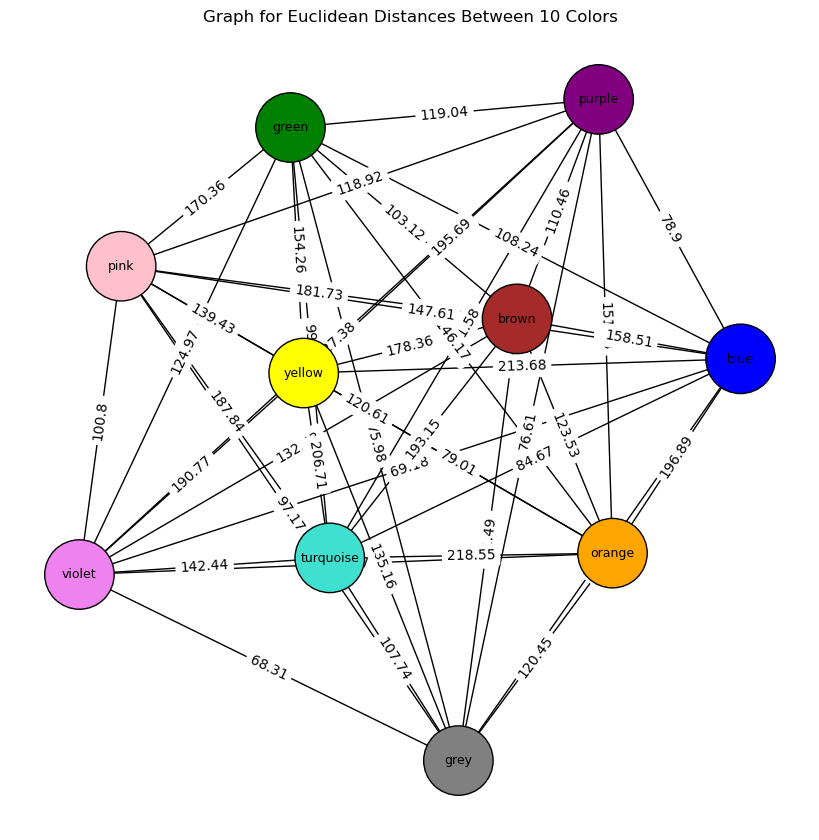

In [10]:
class WeightedGraph:

    def __init__(self, V = [], E = []):
        """
    Parameters
    ----------
    V : list
    empty list of vertexes
    E: list
    empty list of edge pairs 
    
    Returns
    -------
    none 
        
    """
        # initializes empty dictionary 
        self.G = {}

        # adds vertex ad edges in the constructor 
        for v in V:
            self.add_vertex(v)
        for u, v in E:
            self.add_edge(u, v)
            
    def add_vertex(self, v):
        """
    Parameters
    ----------
    v : string
    this string contains the node name 
    
    Returns
    -------
    none 
        
    """
        if v not in self.G:
            self.G[v] = set()
        
    def add_edge(self, u, v):
        """
    Parameters
    ----------
    v : string
    this string contains the node name 
    u: string
    this string contains one of the edge pairs at a time
    
    Returns
    -------
    none 
        
    """
        # add vertices in case they don't already exist
        self.add_vertex(u)
        self.add_vertex(v)

        # add directed edge (u,v)
        self.G[u].add(v)
       
    def __getitem__(self, v):
        """
    Parameters
    ----------
    v : string
    this string contains the node name 
    
    Returns
    -------
    none 
        
    """
        # returns all vertices adjacent to v 
        return self.G.get(v, set())

    
    def get_vertices(self):
        # gets a list of all vertices in the graph
        return list(self.G.keys())

    def get_edges(self):
        # intializes empy list for edges 
        edges = []
        # for each single edge pair in the dictionary 
        for u in self.G:
            # for each node in the dictionary append them to a tuple in the edge list
            for v in self.G[u]:
                edges.append((u,v))
        return edges

    def num_vertices(self):
        # returns the number of vertices in the graph 
        return len(self.G)

    def num_edges(self):
    # return the number of edges in the graph
        
        total = 0
        for v in self.G:
            # adds the number of verticies adjacent to the node and divides by 2
            total += self.deg(v)

        return total // 2

    def deg(self,v):
        """
    Parameters
    ----------
    v : string
    this string contains the node name 
    
    Returns
    -------
    none 
        
    """
        # returns how many other vertices are adjacent to the node 
        return len(self[v])

    def toDF(self,columns=['u', 'v', "weight"]):
        """
    Parameters
    ----------
    columns: list that contains dataframe column names 
        v : string
        this string contains the node name 
        u: string
        this string contains the other node name in the edge pair 
        weight: float
        euclidean distance between nodes 
    
    Returns
    -------
    none 
        
        """
        # convert the graph to a dataframe
        df = pd.DataFrame(columns = columns)
        u_list = []
        v_list = []
        weight_list = []
       
       
        # for u and v in edges    
        for (u,v) in self.get_edges():
            # gets the rgb values for u and v from the top10 dataframe
            # calculates the euclidean distance between the 2 average rgb values 
            # using math.dist
            u_rgb = top_10[top_10["cleaned_colors"] == u]["avg_rgb"]
            v_rgb = top_10[top_10["cleaned_colors"] == v]["avg_rgb"]
            
            for u_values,v_values in zip(u_rgb,v_rgb):
                weight = round(math.dist(u_values, v_values), 2)
            # appends values to dataframe
            u_list.append(u)
            v_list.append(v)
            weight_list.append(weight)
          
           
    
        dict = ({columns[0]:u_list, columns[1]:v_list, columns[2]: weight_list})
        df = pd.DataFrame.from_dict(dict)
        print("Dataframe representing Graph:\n", df)
    
        return df

    def visualize(self, fig = 1, directed=False):
        """
    Parameters
    ----------
    fig : int
    the figure is 1 
    directed: boolean 
    directed is false
    Returns
    -------
    none 
        
    """
        # render the graph using networkx library
        df = self.toDF()
        # sets the properties of the graph 
       
        graph_type = nx.Graph()
        # creates graph using networkx, passes in the dataframe, columns, and sets edge_attr to weight to create a weighted graph 
        # citation: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
        G = nx.from_pandas_edgelist(df, df.columns[0], df.columns[1], create_using=graph_type, edge_attr = "weight")
        edges = nx.spring_layout(G)
        plt.figure(fig, figsize=(8, 8))
        # uses nx.draw to draw the graph
        edge_labels = nx.get_edge_attributes(G, "weight")
   
        nx.draw(G, edges, font_size= 9, node_size= 2500, node_color= G , edgecolors= "black", with_labels=True)
        # gets the labels for the edges using nx.get_edge_attributes 
        # citation: https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.get_edge_attributes.html
        nx.draw_networkx_edge_labels(G, edges, edge_labels)
        # plots title 
        plt.title("Graph for Euclidean Distances Between 10 Colors")
        plt.show()

    def num_edges(self):
        # uses .deg() to calculate the total amount of edges 
        total = 0
        for v in self.G:
            total += self.deg(v)

        return total


def test_graph():
    V = top_10["cleaned_colors"].values
    # sets the nodes to the color values 
    line = []
    # nested for loop to create pairs of colors as edges 
    for i in range(len(V)):
        for j in range(len(V)):
            pair = (V[i], V[j])
            # if the 2 colors in the pair are not the same
            # they are appended to the list 
            if V[i] != V[j]:
                line.append(pair)
    E = line       
    g = WeightedGraph(V, E)
    print('\nGraph')
    # calls num_verticies and num_edges to get the number of verticies and edges 
    print('|V|:', g.num_vertices())
    print('|E|:', g.num_edges())

    # calls the visualize function to draw the graph 
    g.visualize()
    return g


def main():
    # calls the test_graph function 
    g = test_graph()
    
   
main()
     

## **Task 3: Reflecting on the process**

**Write a reflection on your experience working on this project. Discuss the challenges
you encountered during the development of the application, the solutions you
implemented, and the lessons you learned from the project. Reflect on the
effectiveness of the techniques used and propose potential improvements for future
iterations**

One problem I encountered during the devleopment of this application was how to store Alice's colors in a data structure that would be usable with my other data structure of the color dataframe when using the knn model. One solution I implemented was storing the randomly chosen RGB values in a nested list and extracting the data I need from the dataframe as lists as well, so I could make it compatible with the knn model. Another challenge I faced was how to make each function work for k-values 1-12 instead of just running once. The solution I implemented to combat this issue was to call the function in a loop that ran 12 times, in order to produce the 12 outputs I needed instead of trying to do so within the function. These two techniques were effective, and I learned lessons about picking data structures that work efficently together and how to make my code in general more efficent by using loops. One challenge I faced was that I found myself repeating blocks of code at times in different functions. One potential improvement for future iterations that could combat this issue would be to have a function that performs the block of code I need, then calling that function in different places to produce that output instead of repeating the same lines of code multiple times. 

## **Task 4: Going above and beyond**

**You are encouraged to explore your data beyond the scope of the project brief and
uncover hidden information. This could involve various analyses and visualisations
that go beyond the provided tasks**

Task: Find the 20 most commonly confused and least commonly confused color pairs out of the top 50 most frequent colors in the dataset

In [11]:

# filters the avg_df for the top 50 most frequently appeared colors since 
# avg_df is sorted by color frequency 
top_50 = avg_df.head(50)

class StatsGraph(WeightedGraph):

    def __init__(self, V=[], E=[]):
        """
    Parameters
    ----------
    V : list
    empty list of vertexes
    E: list
    empty list of edge pairs 
    
    Returns
    -------
    none 
        
    """
        super().__init__(V, E)
     

    def toDF(self,top_50, columns=['u', 'v', "weight"]):
        """
    Parameters
    ----------
    top_50: dataframe that contains the top 50 most frequent colors and their average RGB values 
    columns: list that contains dataframe column names 
        v : string
        this string contains the node name 
        u: string
        this string contains the other node name in the edge pair 
        weight: float
        euclidean distance between nodes 
    
    Returns
    -------
    none 
        
        """
        # convert the graph to a dataframe
        df = pd.DataFrame(columns = columns)
        u_list = []
        v_list = []
        weight_list = []
        # for u and v in edges    
        for (u,v) in self.get_edges():
            # gets the rgb values for u and v from the top50 dataframe
            # calculates the euclidean distance between the 2 average rgb values 
            # using math.dist
            u_rgb = top_50[top_50["cleaned_colors"] == u]["avg_rgb"]
            v_rgb = top_50[top_50["cleaned_colors"] == v]["avg_rgb"]
            for u_values,v_values in zip(u_rgb,v_rgb):
                weight = math.dist(u_values, v_values)
            # appends values to dataframe
            u_list.append(u)
            v_list.append(v)
            weight_list.append(weight)
        dict = ({columns[0]:u_list, columns[1]:v_list, columns[2]: weight_list})
        df = pd.DataFrame.from_dict(dict)
       
        df = df.sort_values(by = "weight", ascending = False)
        print("These are the 20 least commonly confused color pairs:\n", df.head(20))
        print("These are the 20 most commonly confused color pairs:\n", df.tail(20))
        
        return df
    
    
def test_statsgraph():
    V = top_50["cleaned_colors"].values
    # sets the nodes to the color values 
    line = []
    # nested for loop to create pairs of colors as edges 
    for i in range(len(V)):
        for j in range(len(V)):
            pair = (V[i], V[j])
            # if the 2 colors in the pair are not the same
            # they are appended to the list 
            if V[i] != V[j]:
                # removes identical sets of colors 
                if (V[j], V[i]) not in line:
                    line.append(pair)
            
    E = line
    # create object from StatsGraph class
    stat = StatsGraph(V,E)
    print('|V|:', stat.num_vertices())
    print('|E|:', stat.num_edges())
    df = stat.toDF(top_50, columns=['u', 'v', "weight"])

# call function
df = test_statsgraph()



|V|: 50
|E|: 1225
These are the 20 least commonly confused color pairs:
                u            v      weight
556        black        white  345.721430
851        white   dark brown  326.786830
856        white    navy blue  309.150244
558        black   light pink  304.675988
661   dark green        white  302.074195
859        white     burgundy  298.240275
787    dark blue        white  293.779150
863        white       maroon  292.140131
860        white  olive green  288.842646
531        black    pale pink  288.512265
855        white  dark purple  285.292306
1019  light pink   dark brown  284.465922
546        black   light grey  273.621237
231        brown        white  273.220989
1022  light pink    navy blue  269.271767
864        white    dark grey  269.152651
1040  dark brown    pale pink  267.712112
319       yellow        black  267.304076
663   dark green   light pink  266.087573
627          red        white  262.138504
These are the 20 most commonly confused color